# Stata basics

In [1]:
sysuse auto

(1978 Automobile Data)


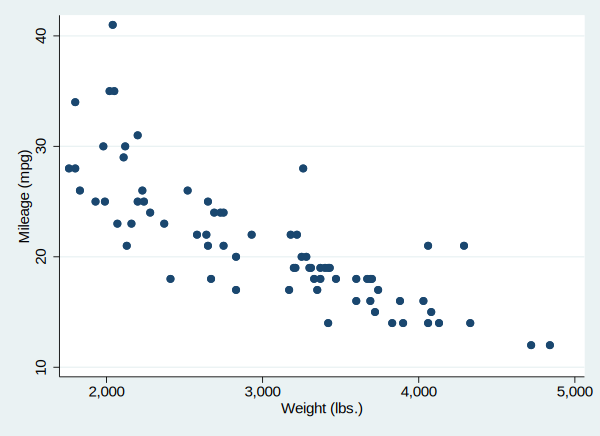

In [2]:
scatter mpg weight